In [37]:
from collections import defaultdict
from math import sqrt
from functools import cache
import seaborn as sns

DEBUG = True

In [38]:
if DEBUG:
    records = [(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)]
    points = [(2, 10), (1, 2), (5, 8)]
else:
    records = []
    print("Enter the records: ")
    while True:
        record = tuple(map(int, input().split()))
        if not record:
            break
        records.append(record)

    clusters = defaultdict(list)
    points = [tuple(map(int, point.split())) for point in input("Enter initial points: ").split(',')]
    k = len(points)

In [39]:
@cache
def distance(X, Y, measure='mn'):
    dist = 0
    for u,v in zip(X, Y):
        dist += abs(u-v) if measure == 'mn' else sqrt(u**2 + v**2)
    return dist

def get_clusters(clusters):
    clusters = defaultdict(list)
    for record in records:
        clusters[min(points, key=lambda point : distance(record, point))].append(record)
    return clusters

def get_points(clusters):
    new_points = []
    for cluster in clusters.values():
        res = [0]*len(cluster[0])
        for point in cluster:
            for i in range(len(point)):
                res[i] += point[i]
        new_points.append(tuple(i/len(cluster) for i in res))
    return new_points

In [40]:
while True:
    prev = tuple(clusters.values())
    clusters = get_clusters(clusters)
    if prev == tuple(clusters.values()):
        break
    points = get_points(clusters)    
    
for i,cluster in enumerate(clusters.values(), 1):
    print(f"cluster {i} -> {cluster}")

print(records)
X, Y = zip(*records)

cluster 1 -> [(2, 10), (5, 8), (4, 9)]
cluster 2 -> [(2, 5), (1, 2)]
cluster 3 -> [(8, 4), (7, 5), (6, 4)]
[(2, 10), (2, 5), (8, 4), (5, 8), (7, 5), (6, 4), (1, 2), (4, 9)]


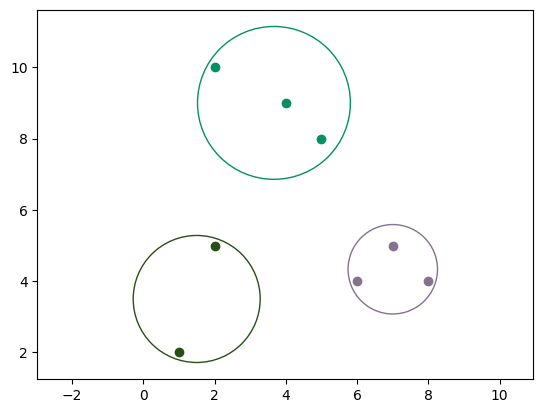

In [41]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

for root, cluster in clusters.items():
    color = np.random.rand(3,) 
    x, y = zip(*cluster)
    radius = max(np.linalg.norm(np.array(root) - np.array(point)) for point in cluster)+0.2
    circle = plt.Circle(xy=root, radius=radius, fill=False, color=color)
    ax.add_patch(circle)
    ax.scatter(x, y, color=color)

plt.axis('equal')  # Optional: to ensure aspect ratio is equal
plt.show()